## Начально-краевая задача для уравнения теплопроводности (ЛР 9, вар. 1)

In [1]:
import warnings
warnings.filterwarnings("ignore", category=UserWarning)

$$\frac{du}{dt} = p(x) \frac{d^2u}{dx^2} + f(t, x)$$

$$u(t, 0) = \mu_1(t)\\u(t, L) = \mu_2(t)$$

$$\Omega = \{(x, t): 0< x<L, 0<t<T \}$$

Условия:
$$\begin{equation*}
 \begin{cases}
   p(x) = 1 + x^2
   \\
   f(t, x) = x^2 - t^2
   \\
   \phi(x)=  (1 - x)^2
   \\
   \mu_1(t) = 1
   \\ 
   \mu_2(t) = 2t
   \\ 
   L = 2
   \\
   T = 1
 \end{cases}
\end{equation*}$$

In [13]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
from matplotlib import cm
%matplotlib qt

In [3]:
def f(t, x): return np.power(x, 2) - np.power(t, 2)
def p(x): return 1 + np.power(x, 2)
def phi(x): return np.power(1 - x, 2)
def mu_2(t): return 2 * t
def mu_1(t): return 1
# def f(t, x): return - t * (0.5 + np.power(x,2))
# def p(x): return 0.3* x
# def phi(x): return x * (2 - x)
# def mu_2(t): return np.power(t, 2)
# def mu_1(t): return t

$$\begin{equation*}
 \begin{cases}
   u_{x}' = (1 + x^2)u_{xx}'' + x^2 - t^2
   \\
   u(t, 0) = 1
   \\
   u(t, 2) = 2t
   \\
   x \in (0, 2)
   \\
   t \in (0, 1)
 \end{cases}
\end{equation*}$$

## Явная разностная схема:

$$\begin{equation*}
 \begin{cases}
   y_{n}^{j + 1} = j_{n}^{j} + p(x_n) \frac{\tau}{h^2}(y_{n-1}^{j} - 2y_{n}^{j} + y_{n+1}^{j}) + \tau f(t_m, x_n), \quad n = \overline{1, N-1}, j = \overline{0, M -1}
   \\
   y_{n}^{0} = \phi(x_n), \quad n = \overline{0, N}
   \\
   y_{0}^{j} = \mu_1(t_j)
   \\
   y_{N}^{j} = \mu_2(t_j)
   \\
   x_n = n \cdot h
   \\
   t_j = j \cdot \tau
   \\
   M \geq 2N^2, \quad \tau '\leq h^2/2
 \end{cases}
\end{equation*}$$

In [4]:
def solve(N):
    n = N
    L = 2
    h = L/n
    q = 0.6
    gamma = np.power(h, 2)/(2 * q)
    m = 2 * n * n
    tau = 1/m
    y = np.zeros((m + 1) * (n + 1)).reshape(m + 1, n + 1)
    X, T, Y = np.array([]), np.array([]), np.array([]) 
    y[:, 0] = np.array([mu_1(i * tau) for i in range(0, m + 1)])
    y[:, n] = np.array([mu_2(i * tau) for i in range(0, m + 1)])
    y[0,:] = np.array([phi(i * h) for i in range(0, n + 1)])
    for k in range(0, m):
        for i in range(1, n):
            x = i * h
            t = k * tau
            y[k + 1, i] = y[k, i] + (p(x)) * (tau/np.power(h, 2)) * (y[k, i + 1] - 2 * y[k ,i] + y[k, i - 1]) + tau * f(t, x)
    for i in range(0, n + 1):
        for j in range(0, m + 1):
            Y = np.append(Y, y[j, i])
            T = np.append(T, j * tau)
            X = np.append(X, i * h)
    return X, T, Y, y

In [5]:
x, t, y, matrix = solve(10)
n = 10
m = 2 * n * n

In [14]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
surf = ax.plot_trisurf(x, t, y, cmap=cm.jet, linewidth=0)
fig.colorbar(surf)
ax.set_xlabel(r'$x$')
ax.set_ylabel(r'$t$')
ax.set_zlabel(r'$u$')
ax.xaxis.set_major_locator(MaxNLocator(5))
ax.yaxis.set_major_locator(MaxNLocator(6))
ax.zaxis.set_major_locator(MaxNLocator(5))
fig.tight_layout()
plt.show()

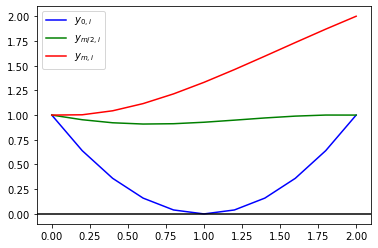

In [7]:
%matplotlib inline
plt.plot(np.linspace(0, 2, n + 1), matrix[0,:], color = 'blue',
        label = r'$y_{0, i}$')
plt.plot(np.linspace(0, 2, n + 1), matrix[int(m/2),:], color = 'green',
        label = r'$y_{m/2, i}$')
plt.plot(np.linspace(0, 2, n + 1), matrix[m,:], color = 'red',
        label = r'$y_{m, i}$')
plt.axhline(y=0, color='black')
plt.legend()

## Оценка погрешности по Рунге на последнем временном слое: 

$$r = |y1_{N}^{j} - y2_{2N}^{j::8}|$$

In [8]:
x1, t1, y1, matrix1 = solve(20)
x2, t2, y2, matrix2 = solve(40)

In [9]:
len(matrix1[:, 20][:803]), len(matrix2[::4, 40])

(801, 801)

In [10]:
r = np.abs(matrix2[::4, 40] - matrix1[:, 20][:803])

In [11]:
np.max(r)

0.0